In [2]:
import tensorflow as tf
import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
(X_train, y_train), (X_test, y_test)=datasets.cifar10.load_data()
X_train.shape, X_test.shape

170498071/170498071 [==============================] - 4s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [1]:
def plot_sample(X, y,index):
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

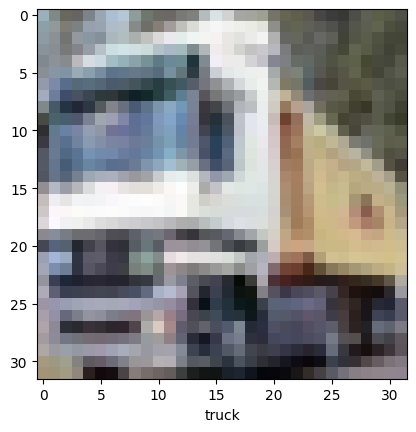

In [6]:
plot_sample(X_train, y_train, 1)

In [7]:
#Normalisation
X_train=X_train/255
X_test=X_test/255

In [8]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    #dense
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 64s 39ms/step - loss: 1.5246 - accuracy: 0.4436
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.1665 - accuracy: 0.5869
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0348 - accuracy: 0.6381
Epoch 4/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.9527 - accuracy: 0.6699
Epoch 5/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8877 - accuracy: 0.6942
Epoch 6/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.8367 - accuracy: 0.7093
Epoch 7/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7951 - accuracy: 0.7248
Epoch 8/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7580 - accuracy: 0.7382
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7321 - accuracy: 0.7477
Epoch 10/10
1563/1563 [==============================] - 59s 38m

In [9]:
y_pred=cnn.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]

313/313 [==============================] - 5s 16ms/step


In [10]:
y_test=y_test.reshape(-1,)

Calculated Class: ship
Test Dataset Label:


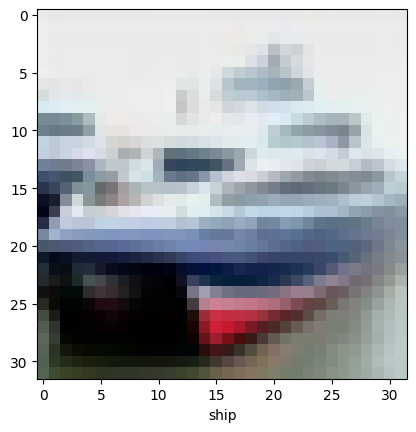

In [11]:
print("Calculated Class:",classes[y_classes[1]])
print("Test Dataset Label:")
plot_sample(X_test, y_test, 1)

In [12]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: \n",classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.64      0.81      0.72      1000
           1       0.81      0.82      0.81      1000
           2       0.63      0.53      0.57      1000
           3       0.60      0.39      0.47      1000
           4       0.68      0.60      0.64      1000
           5       0.61      0.63      0.62      1000
           6       0.71      0.81      0.76      1000
           7       0.69      0.79      0.74      1000
           8       0.84      0.73      0.78      1000
           9       0.72      0.82      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

